# Section 5.5.5
# Superposition in space, land strip sudden change same at both ends

IHE, Delft, transient groundwater

@T.N.Olsthoorn, 2019-01-02

## Context

The 1D aquifer has a limited width equal to $L$. The head at $x=0$ changes suddenly at $t=0$ by the value $a$, while the head at $x=L$ remains fixed.

The solution for an infinite aquifer with sudden head change at $x=0$ reads

$$ s(x, t) = s(x, 0) \, \mathtt{erfc} \left(\sqrt{\frac {x^2 S} {4 kD t}} \right) $$

In this case the head change at $t=0$ is at both ends of the strip and equal to $a$.

For convenience and symmetry we choose $x=0$ in the center of the strip. So the left is $x=-L/2$ and the right it is $x=+L/2$.

Compensating sudden head change at the left side requires mirror changes equal to $-a$ at $x = \pm (2 i - \frac 1 2) L$ atarting at $i=0$ and mirror changes equal to $-a$ at $x = \pm (2 i - \frac 1 2) L $ starting at $i=1$.

This superposition can, therefore, be written as

$$ s(x, t) = a \left[ \sum _0 ^\infty \left\{
 \mathtt{erfc} \left(((2 i + \frac 1 2) L + x) \sqrt{ \frac S {4 kD t} } \right)
+
\mathtt{erfc} \left(((2 i + \frac 1 2) L - x) \sqrt{\frac S {4 kD t}} \right) 
\right\}
-
 \sum_1 ^\infty \left\{
\mathtt{erfc} \left(((2 i - \frac 1 2) L - x) \sqrt{\frac S {4 kD t}} \right)
+
\mathtt{erfc} \left(((2 i - \frac 1 2) L + x) \sqrt{\frac S {4 kD t}} \right)
\right\} \right] $$

## Loading modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

## Convenience function for setting up a graph

In [3]:
def newfig(title='?', xlabel='?', ylabel='?', xlim=None, ylim=None,
                   xscale='linear', yscale='linear', size_inches=(14, 8)):
    '''Setup a new axis for plotting'''
    fig, ax = plt.subplots()
    fig.set_size_inches(size_inches)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xscale(xscale)
    ax.set_yscale(yscale)
    if xlim is not None: ax.set_xlim(xlim)
    if ylim is not None: ax.set_ylim(ylim)
    ax.grid(True)
    return ax

## Strip with $x=0$ at left, $-L/2 < x < L/2$

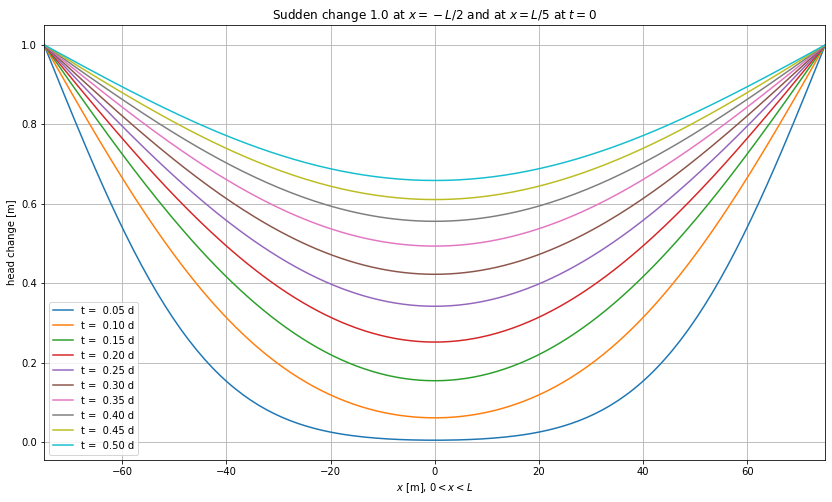

In [4]:
L = 150 # m (strip wirdth)
x = np.linspace(-L/2, L/2, 201) # points, taking left at zero.
kD = 600 # m2/d
S = 0.1 # [-]
a = 1.0 # m, sudden head change at x = -L/2
times = np.linspace(0, 0.5, 11)[1:] # d

ax = newfig(f'Sudden change {a:.1f} at $x = -L/2$ and at $x = L/5$ at $t=0$',
                        '$x$ [m], $ 0 < x < L $', 'head change [m]', xlim=(-L/2, L/2))

for t in times:
    rt = np.sqrt(S / (4 * kD * t))
    s = np.zeros_like(x)
    for i in range(20):
        s += a * erfc(((2 * i + 0.5) * L + x) * rt)
        s += a * erfc(((2 * i + 0.5) * L - x) * rt)
        if i > 0:
            s -= a * erfc(((2 * i - 0.5) * L - x) * rt)
            s -= a * erfc(((2 * i - 0.5) * L + x) * rt)
    ax.plot(x, s, label='t = {:5.2f} d'.format(t))
ax.legend()
